<a href="https://colab.research.google.com/github/morteza-nouri/AI-TensorFlow/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence - Computer Assignment 5 - Phase 2**

> **Morteza Nouri, 810198481**

## __Gloals:__

## __Description:__

## **Phase 1: Preprocess**



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp "/content/drive/MyDrive/A_Z Handwritten Data.csv" .

In [2]:
import pandas as pd

df = pd.read_csv('A_Z Handwritten Data.csv')

The original data type of columns was int64 which consumed much memory, I change the columns type to unsigned 8 bit integer to lower the memory usage. <br>
(_*Note: unit8 is sufficient to represent the data in our dataset._)

In [3]:
df = df.astype("uint8")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: uint8(785)
memory usage: 278.8 MB


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# function to get corresponding alphabet.(A-Z mapped to 0-25 in order in dataset)

def getAlphabet(n):
  return chr(n + 65)


In [84]:
import numpy as np

# construct labels
labels = df['0'].apply(getAlphabet)
data = df.iloc[:,1:].values
data = data.reshape(-1, 28, 28)
working_df = pd.DataFrame({'Label': labels, 'data': [*data]})
working_df

,Label,data
0,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
372445,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372446,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372447,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372448,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


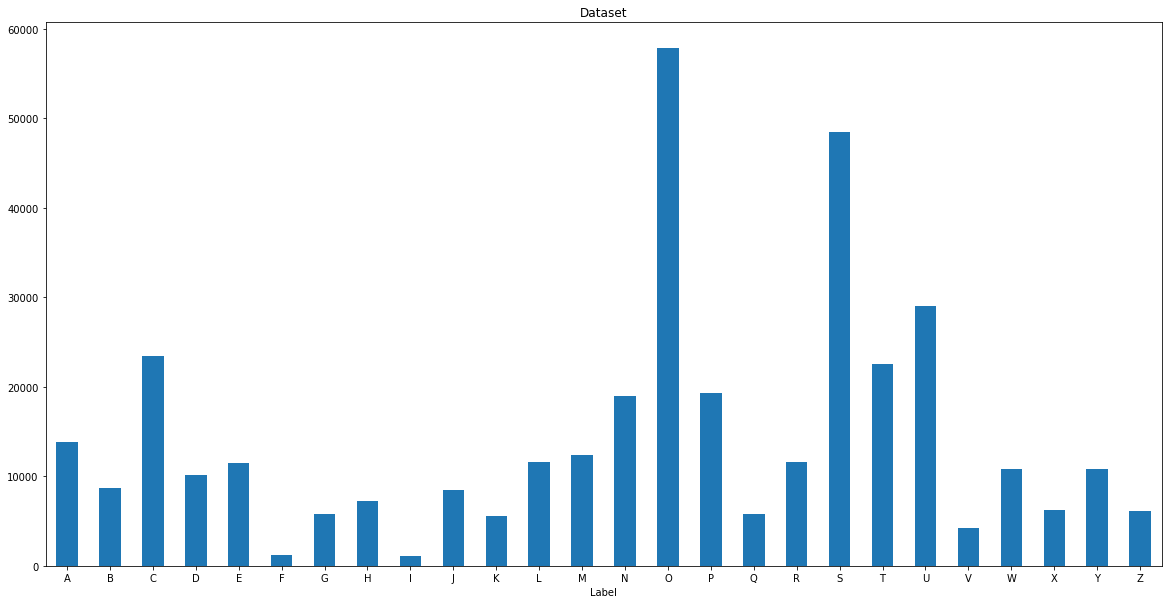

In [85]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
working_df.groupby('Label').size().plot(kind='bar', title='Dataset')
plt.xticks(rotation='horizontal')
plt.show()



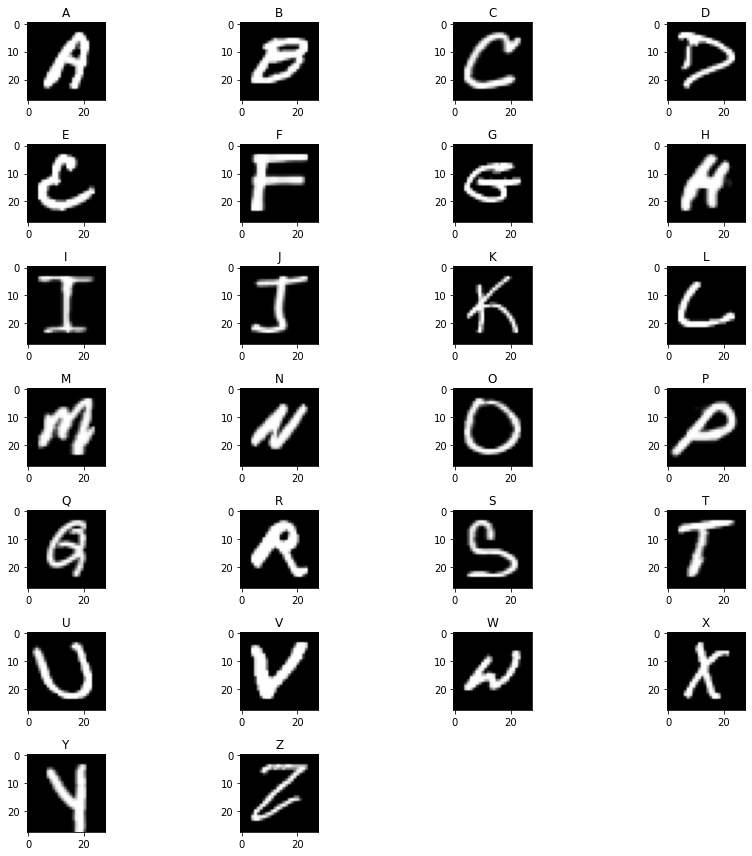

In [92]:
plt.figure(figsize=(12,12))
i = 0
for label, row in working_df.groupby('Label').first().iterrows():
    plt.subplot(7, 4, i + 1)
    plt.imshow(row['data'], cmap='Greys_r')
    plt.title(label)
    i += 1

plt.tight_layout()
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(working_df, stratify=working_df['Label'], test_size=0.2)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)